In [2]:
# Import the required packages
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import itertools
from enum import Enum

learning_rate = 0.01
num_steps = 2000
batch_size = 100
display_step = 100

FIELD_X = 1052
FIELD_DX = 66
FIELD_Y = 221
FIELD_DY = 57
FIELD_SIZE = 6

SCAN_RADIUS = 17



In [3]:
class Marble(Enum):
    none = 0
    Salt = 1
    Air = 2
    Fire = 3
    Water = 4
    Earth = 5
    Vitae = 6
    Mors = 7
    Quintessence = 8
    Quicksilver = 9
    Lead = 10
    Tin = 11
    Iron = 12
    Copper = 13
    Silver = 14
    Gold = 15

    def symbol(self):
        if self.value is self.none.value:
            return "-"
        if self.value in range(self.Quicksilver.value, self.Gold.value + 1):
            return self.name[0].upper()
        else:
            return self.name[0].lower()

def field_positions():
    d = FIELD_SIZE - 1
    result = []
    for y in range(-d, d + 1):
        for x in range(-d, d + 1):
            if not abs(y - x) > d:
                result.append((x + d, y + d))
    return result


def pixels_to_scan():
    pxs = []
    for dy in range(-SCAN_RADIUS + 1, SCAN_RADIUS):
        for dx in range(-SCAN_RADIUS + 1, SCAN_RADIUS):
            pxs.append((dx, dy))
    return pxs


def lightness_at(img, x, y):
    _min, _max = img.getpixel((x, y))
    return _min / 255


def edges_at(img, x, y):
    result = []
    for (xx, yy) in PIXELS_TO_SCAN:
        result.append(lightness_at(img, x + xx, y + yy))
    return result


def img_pos(x, y):
    return FIELD_X + FIELD_DX * (x * 2 - y) / 2, FIELD_Y + FIELD_DY * y


FIELD_POSITIONS = field_positions()
PIXELS_TO_SCAN = pixels_to_scan()

MARBLE_BY_SYMBOL = dict(zip([Marble.symbol(e) for e in Marble], [e.name for e in Marble]))


In [5]:
def load_mnist():
    images, labels = [], []
    for i in range(1, 7):
        img = Image.open(os.path.join("sample", str(i) + ".png")).convert('LA')
        samples = list(itertools.chain.from_iterable(
            [lines.split() for lines in open(os.path.join("sample", str(i) + ".txt"), "r").readlines()]))
        for j, (pos, symbol) in enumerate(zip(FIELD_POSITIONS, samples)):
            marble = MARBLE_BY_SYMBOL[symbol]
            edge_pixels = edges_at(img, *img_pos(*pos))
            images.append(edge_pixels)
            labels.append(Marble[marble].value)
    return np.array(images), np.array(labels)
X_train, y_train = load_mnist()

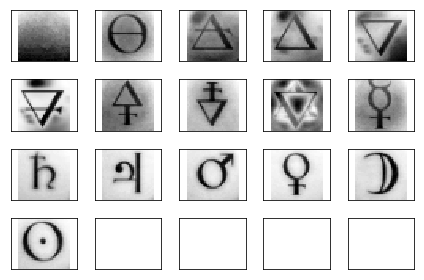

In [7]:

%matplotlib inline

fig, ax = plt.subplots(nrows=4, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(16):
    img = X_train[y_train == i][0].reshape(33, 33)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('./figures/mnist_all.png', dpi=300)
plt.show()

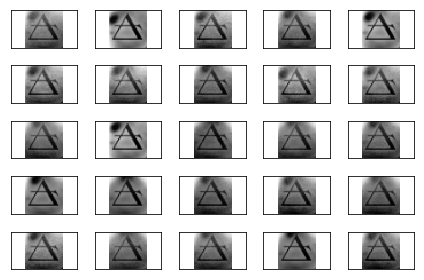

In [21]:

fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(25):
    img = X_train[y_train == 2][i].reshape(33, 33)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('./figures/mnist_7.png', dpi=300)
plt.show()

In [39]:
from keras.models import load_model
model = load_model('model.h5')
x_train = X_train.reshape(X_train.shape[0], 33, 33, 1)
print(x_train[0].shape[0])
model.predict(x_train[0:2])



33


array([[  1.86747217e-04,   4.48868304e-05,   3.88792978e-05,
          6.33526943e-05,   5.73488325e-02,   9.41648960e-01,
          3.10931173e-05,   4.78586968e-04,   6.05976481e-07,
          2.90057251e-05,   8.23589071e-05,   2.79435881e-06,
          1.11343898e-05,   4.00233546e-07,   7.05917410e-06,
          2.53240814e-05],
       [  4.59385991e-01,   3.27404588e-02,   1.04906961e-01,
          7.85701126e-02,   5.90334125e-02,   3.47241573e-02,
          3.30893472e-02,   2.43066847e-02,   8.59995186e-03,
          8.63118097e-02,   1.19915903e-02,   1.42944586e-02,
          1.85364075e-02,   1.00445300e-02,   9.44327284e-03,
          1.40207792e-02]], dtype=float32)